# Trafficking People Data set
Application of data mining process as a final project for *Data mining* course at _Universidad Nacional de Colombia_.</br>
Profesor on charge _[ELizabeth León Guzmán](https://github.com/elizleon)_ PH. D. at University of Louisville.

Authors of the project
* Juan Manuel Correa Lombana
* Julio Ernesto Quintero Peña

# Clustering

In [1]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from utils import load_data

np.random.seed(42)


In [2]:
# Load preprocessed data
pca_2d = load_data('../data/pca_2_dimensions.zip', use_cols=False)
data_scaled = StandardScaler().fit_transform(pca_2d[['x_0', 'x_1']])

random_ = np.random.choice(data_scaled.shape[0], 100, replace=False)
subset_data = data_scaled[random_]


In [7]:
# k neighbors to try for better performance
k_values = range(1, 50)

# Square sum distances
inertia = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', n_init=10)
    k_means.fit(data_scaled)
    inertia.append(k_means.inertia_)

# Plot SSE vs k neighbors
elbow_fig = px.line(
    x=k_values,
    y=inertia,
    markers=True,
    title='Elbow for KMeans',)

elbow_fig.update_layout(
    xaxis_title="k",
    yaxis_title="SSE",
)
elbow_fig.update_traces(
    hovertemplate='<br>k = %{x}<br>SSE = %{y}<extra></extra>'
)

elbow_fig.show()


In [8]:
k_means = KMeans(n_clusters=10, init='k-means++', n_init=10)
pca_2d['k_means'] = k_means.fit_predict(data_scaled)

# PLot clusters of K-means
k_means_plot = px.scatter(
    pca_2d,
    x='x_0',
    y='x_1',
    color='k_means',
    opacity=.4
)

k_means_plot.update_traces(
    hovertemplate='<br>x_0 = %{x:.3f}<br>x_1 = %{y:.3f}<br>cluster = %{marker.color}<extra></extra>'
)

k_means_plot.show()


In [ ]:
# Lista de valores de eps que se probarán
eps_values = np.linspace(0.1, 1.0, num=20)

# Lista para almacenar las puntuaciones de la densidad
density_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    dbscan_labels = dbscan.fit_predict(data_scaled)

    # Contar el número de clústeres (excluyendo ruido)
    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    # Calcular la puntuación de la densidad como el inverso del número de clústeres
    density_score = 1 / (num_clusters + 1)
    density_scores.append(density_score)

# Graficar las puntuaciones de la densidad en función de eps
plt.figure(figsize=(8, 5))
plt.plot(eps_values, density_scores, marker='o')
plt.title('Puntuación de Densidad en función de eps (DBSCAN)')
plt.xlabel('Valor de eps')
plt.ylabel('Puntuación de Densidad')
plt.grid()
plt.show()


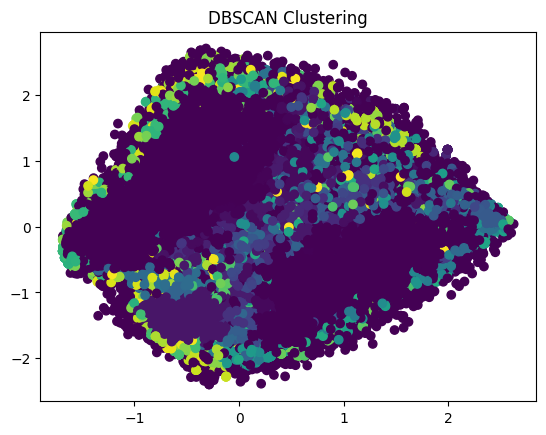

In [9]:
dbscan = DBSCAN(eps=0.02
                ,min_samples=3)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Graficar los resultados de DBSCAN
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [5]:
random_indices = np.random.choice(data_scaled.shape[0], 100, replace=False)
subset_data_1h = data_scaled[random_indices]


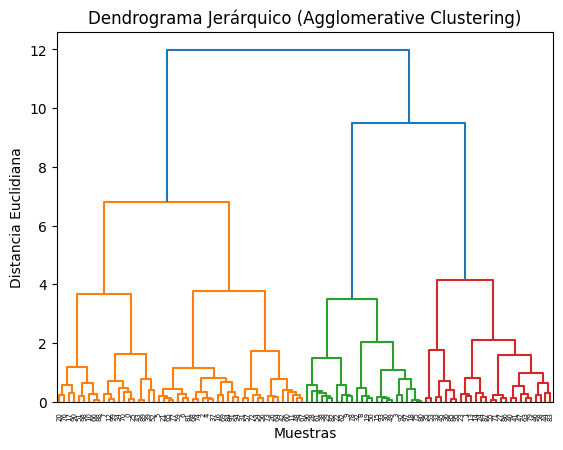

In [6]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(subset_data_1h)

# Calcular el dendrograma jerárquico
dendrogram = sch.dendrogram(sch.linkage(subset_data_1h, method='ward'))

# Configurar el gráfico
plt.title('Dendrograma Jerárquico (Agglomerative Clustering)')
plt.xlabel('Muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()
